count    1000.000000
mean     1075.319000
std       513.157301
min       100.000000
25%       661.500000
50%      1079.500000
75%      1499.000000
max      1999.000000
Name: sales, dtype: float64
                count         mean         std    min    25%     50%     75%  \
store_location                                                                 
Chicago         331.0  1103.064955  508.935082  100.0  697.5  1079.5  1509.5   
Los Angeles     330.0  1064.080303  502.591552  100.0  675.0  1079.5  1427.0   
New York        339.0  1059.168142  527.645226  100.0  635.5  1079.5  1519.5   

                   max  
store_location          
Chicago         1996.0  
Los Angeles     1998.0  
New York        1999.0  
                  count         mean         std    min     25%     50%  \
product_category                                                          
Clothing          352.0  1072.771307  516.437480  139.0  657.75  1079.5   
Electronics       343.0  1090.908163  519.922390  100

<ipython-input-27-1bbbf0a5bfa5>:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_age_gender=full_data.groupby(['age_group','customer_gender','product_category'])['sales'].sum().reset_index()


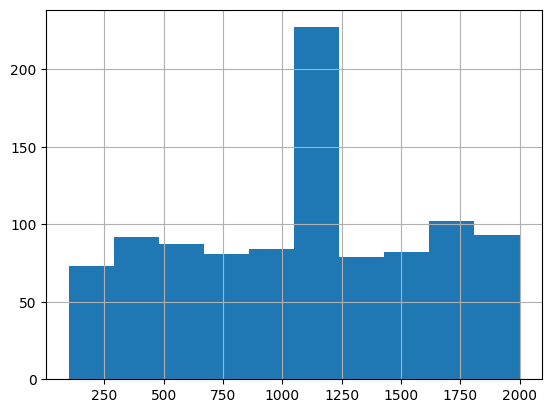

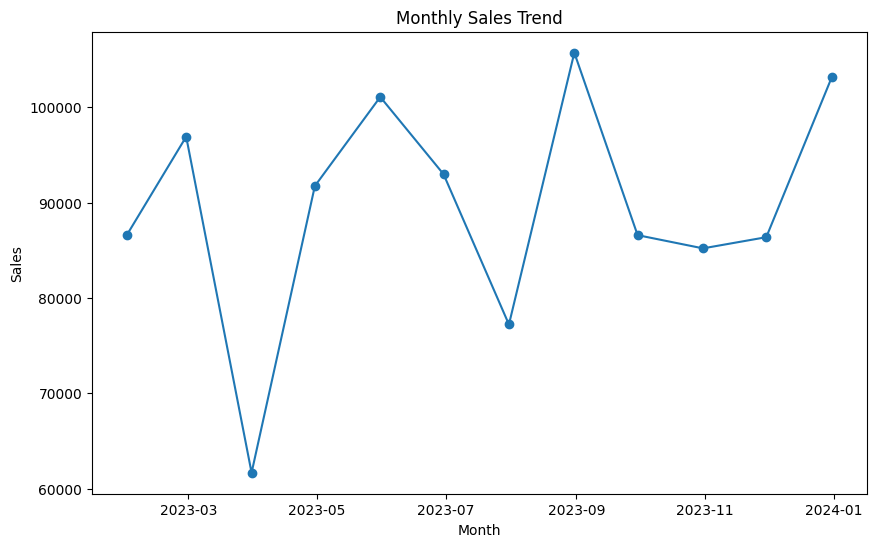

<ipython-input-27-1bbbf0a5bfa5>:77: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_age_gender = sales_by_age_gender.groupby(['age_group', 'product_category'], as_index=False)['sales'].sum()


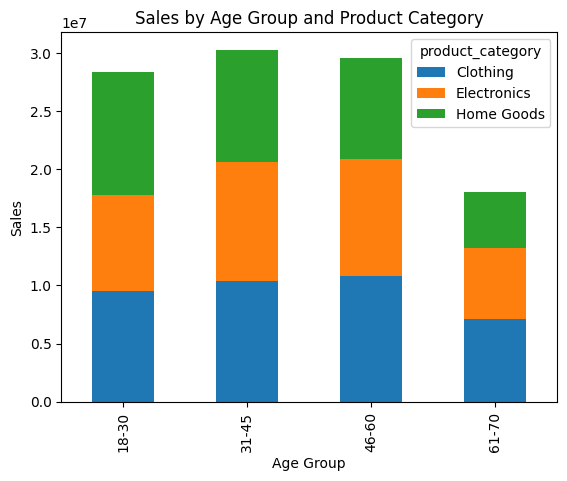

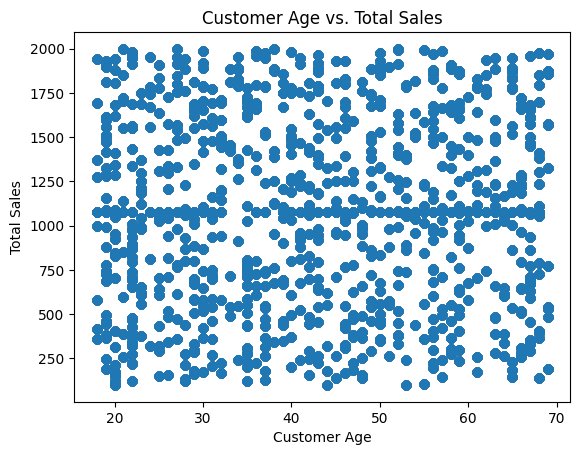

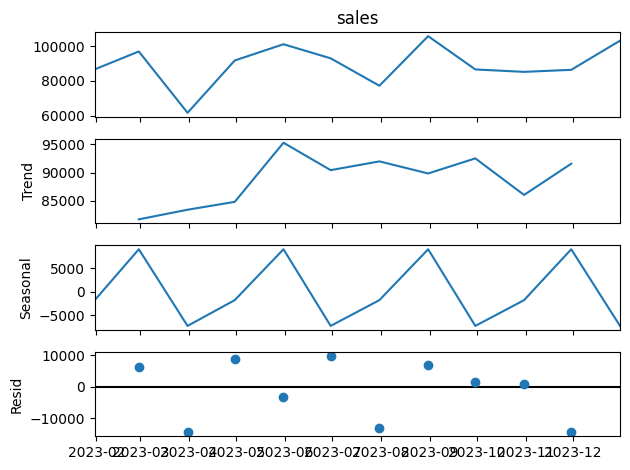

In [27]:
import pandas as pd

#Data Cleaning and Reprocessing
#Load sales data
sales_data = pd.read_csv('retail_sales_data.csv')

#Convert sales column to numeric, force errors to NaN (Not a Number)
sales_data['sales'] = pd.to_numeric(sales_data['sales'],errors='coerce')
#Replace missing values with median of sales column
sales_data['sales'].fillna(sales_data['sales'].median(),inplace=True)

#Ensure sales_date is in datetime format
sales_data['sale_date']=pd.to_datetime(sales_data['sale_date'])

#Data Exploration
#Summary statistics for sales
sales_summary=sales_data['sales'].describe()
print(sales_summary)

#Distribution of sales values
sales_distribution=sales_data['sales'].hist()

#Summary by location and category
location_summary=sales_data.groupby('store_location')['sales'].describe()
category_summary=sales_data.groupby('product_category')['sales'].describe()
print(location_summary)
print(category_summary)

#Data Transformation
#Load customer and product data
customer_data=pd.read_csv('customer_data.csv')
product_data=pd.read_csv('product_data.csv')

#Merge (join) sales data with customer data
sales_customer_data=pd.merge(sales_data,customer_data,on='customer_id',how='left')
#Merge this with product data
full_data=pd.merge(sales_customer_data,product_data,on='product_category',how='left')

#Analyse sales by customer demographics
#Create age groups
full_data['age_group']=pd.cut(full_data['customer_age'],bins=[18,30,45,60,70],labels=['18-30','31-45','46-60','61-70'])

#Analyse sales by age group and gender
sales_by_age_gender=full_data.groupby(['age_group','customer_gender','product_category'])['sales'].sum().reset_index()
print(sales_by_age_gender)

#Time Series Analysis
#Set sale_date as index
sales_data.set_index('sale_date',inplace=True)
#Calculate monthly sales totals
monthly_sales=sales_data['sales'].resample('M').sum() # resamples date by month and sums the sales for each month
print(monthly_sales)

#Decompose time series
#Import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
#Decompose into trend, seasonal and residual components
decomposition=seasonal_decompose(monthly_sales,model='additive',period=3)

#Analyse purchase frequency
purchase_frequency=full_data.groupby('customer_id')['sale_date'].count().reset_index()
print(purchase_frequency)

#Data Visualisation
#Import matplotlib
import matplotlib.pyplot as plt

#Line plot of monthly sales
plt.figure(figsize=(10,6))
plt.plot(monthly_sales,marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Aggregate duplicates by summing sales
sales_by_age_gender = sales_by_age_gender.groupby(['age_group', 'product_category'], as_index=False)['sales'].sum()
#Bar chart of sales by product category and age group
sales_by_age_gender.pivot(index='age_group',columns='product_category',values='sales').plot(kind='bar',stacked=True)
plt.title('Sales by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Sales')
plt.show()

#Scatter plot of customer age vs. total sales
plt.scatter(full_data['customer_age'],full_data['sales'])
plt.title('Customer Age vs. Total Sales')
plt.xlabel('Customer Age')
plt.ylabel('Total Sales')
plt.show()

#Decomposed time series plots
decomposition.plot()
plt.show()